In [15]:
library(repr)    # for figure size
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [16]:
is.Date <- function(x) inherits(x, 'Date')

# Importation du trainfull modifié

In [17]:
trainfull <- read.csv('trainfull_modifié.csv', row.names=1)

## Remise au format date

In [18]:
trainfull$YearBuilt <- as.Date(
    ISOdate(trainfull[, 'YearBuilt'], 01, 01), format = "Y-%m-%d")
trainfull$YearRemodAdd <- as.Date(
    ISOdate(trainfull[, 'YearRemodAdd'], 01, 01), format = "Y-%m-%d")
trainfull$GarageYrBlt <- as.Date(
    ISOdate(trainfull[, 'GarageYrBlt'], 01, 01), format = "Y-%m-%d")
trainfull$YrSold <- as.Date(trainfull[, 'YrSold'], format = "%Y-%m-%d")

In [19]:
options(repr.matrix.max.cols=200)
head(trainfull)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<date>,<date>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<date>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<date>,<fct>,<fct>,<int>
1,60,RL,65,8450,None,4,Inside,CollgCr,Norm,1Fam,2Story,5,2003-01-01,2003-01-01,Gable,0,VinylSd,VinylSd,BrkFace,196,3,PConc,4,1,6,706,150,0,5,1,5,856,854,1,0,2,1,3,4,8,0,None,Attchd,2003-01-01,RFn,548,3,0,61,None,None,0,2008-02-01,WD,Normal,208500
2,20,RL,80,9600,None,4,FR2,Veenker,Feedr,1Fam,1Story,8,1976-01-01,1976-01-01,Gable,0,MetalSd,MetalSd,None,0,3,CBlock,4,4,5,978,284,0,5,1,5,1262,0,0,1,2,0,3,3,6,1,TA,Attchd,1976-01-01,RFn,460,3,298,0,None,None,0,2007-05-01,WD,Normal,181500
3,60,RL,68,11250,None,3,Inside,CollgCr,Norm,1Fam,2Story,5,2001-01-01,2002-01-01,Gable,0,VinylSd,VinylSd,BrkFace,162,3,PConc,4,2,6,486,434,0,5,1,5,920,866,1,0,2,1,3,4,6,1,TA,Attchd,2001-01-01,RFn,608,3,0,42,None,None,0,2008-09-01,WD,Normal,223500
4,70,RL,60,9550,None,3,Corner,Crawfor,Norm,1Fam,2Story,5,1915-01-01,1970-01-01,Gable,0,Wd Sdng,Wd Shng,None,0,3,BrkTil,3,1,5,216,540,0,4,1,5,961,756,1,0,1,0,3,4,7,1,Gd,Detchd,1998-01-01,Unf,642,3,0,35,None,None,0,2006-02-01,WD,Abnorml,140000
5,60,RL,84,14260,None,3,FR2,NoRidge,Norm,1Fam,2Story,5,2000-01-01,2000-01-01,Gable,0,VinylSd,VinylSd,BrkFace,350,3,PConc,4,3,6,655,490,0,5,1,5,1145,1053,1,0,2,1,4,4,9,1,TA,Attchd,2000-01-01,RFn,836,3,192,84,None,None,0,2008-12-01,WD,Normal,250000
7,20,RL,75,10084,None,4,Inside,Somerst,Norm,1Fam,1Story,5,2004-01-01,2005-01-01,Gable,0,VinylSd,VinylSd,Stone,186,3,PConc,5,3,6,1369,317,0,5,1,5,1694,0,1,0,2,0,3,4,7,1,Gd,Attchd,2004-01-01,RFn,636,3,255,57,None,None,0,2007-08-01,WD,Normal,307000


## Complément des modalités manquantes dans le set qui entraîne le modèle
- => car pourraient être présentes dans le test ou en production

In [21]:
levels(trainfull$Exterior1st) <- c(levels(trainfull$Exterior1st), 'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing')
levels(trainfull$Exterior2nd) <- c(levels(trainfull$Exterior2nd), 'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing')
levels(trainfull$Foundation) <- c(levels(trainfull$Foundation), 'BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood')
levels(trainfull$GarageType) <- c(levels(trainfull$GarageType), '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd')
levels(trainfull$LotConfig) <- c(levels(trainfull$LotConfig), 'Inside', 'Corner', 'CulDSac', 'FR2', 'FR3')
levels(trainfull$MasVnrType) <- c(levels(trainfull$MasVnrType), 'BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone')
levels(trainfull$MSZoning) <- c(levels(trainfull$MSZoning), 'A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM')
levels(trainfull$PoolQC) <- c(levels(trainfull$PoolQC), 'Po', 'Fa', 'TA', 'Gd', 'Ex')
levels(trainfull$RoofStyle) <- c(levels(trainfull$RoofStyle), 'Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed')
levels(trainfull$SaleCondition) <- c(levels(trainfull$SaleCondition), 'Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial')
levels(trainfull$SaleType) <- c(levels(trainfull$SaleType), 'WD ', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth')

# Train / val split

In [22]:
train <- sample(nrow(trainfull), 0.8*nrow(trainfull), replace = FALSE)
TrainSet <- trainfull[train,]
ValidSet <- trainfull[-train,]

In [23]:
dim(TrainSet)
dim(ValidSet)

[1] 913  56

[1] 229  56

# Entraînement du modèle

In [24]:
RF.res <- randomForest(SalePrice~., data = TrainSet, importance = TRUE)
RF.res


Call:
 randomForest(formula = SalePrice ~ ., data = TrainSet, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 18

          Mean of squared residuals: 1002604757
                    % Var explained: 86.25

## Test modèle avec paramètres différents

In [25]:
RF.res2 <- randomForest(SalePrice~., data = TrainSet, importance = TRUE, mtry=55, ntree=1000)
RF.res2


Call:
 randomForest(formula = SalePrice ~ ., data = TrainSet, importance = TRUE,      mtry = 55, ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 55

          Mean of squared residuals: 917272114
                    % Var explained: 87.42

## Reprise du modèle initial (proche)

In [26]:
RF.res.importance <- importance(RF.res)
RF.res.importance[order(RF.res.importance[,1], decreasing = T),]

,%IncMSE,IncNodePurity
Neighborhood,28.6804195,1.457029e+12
X1stFlrSF,23.5560563,5.824533e+11
X2ndFlrSF,19.7451906,2.528126e+11
GarageArea,19.2029206,6.220025e+11
FullBath,16.2850690,3.230760e+11
BsmtFinSF1,14.4676770,2.630171e+11
TotRmsAbvGrd,13.8752791,2.295671e+11
YearBuilt,13.5246913,5.587971e+11
LotArea,13.3993599,1.994771e+11
KitchenQual,12.4587203,4.488030e+11


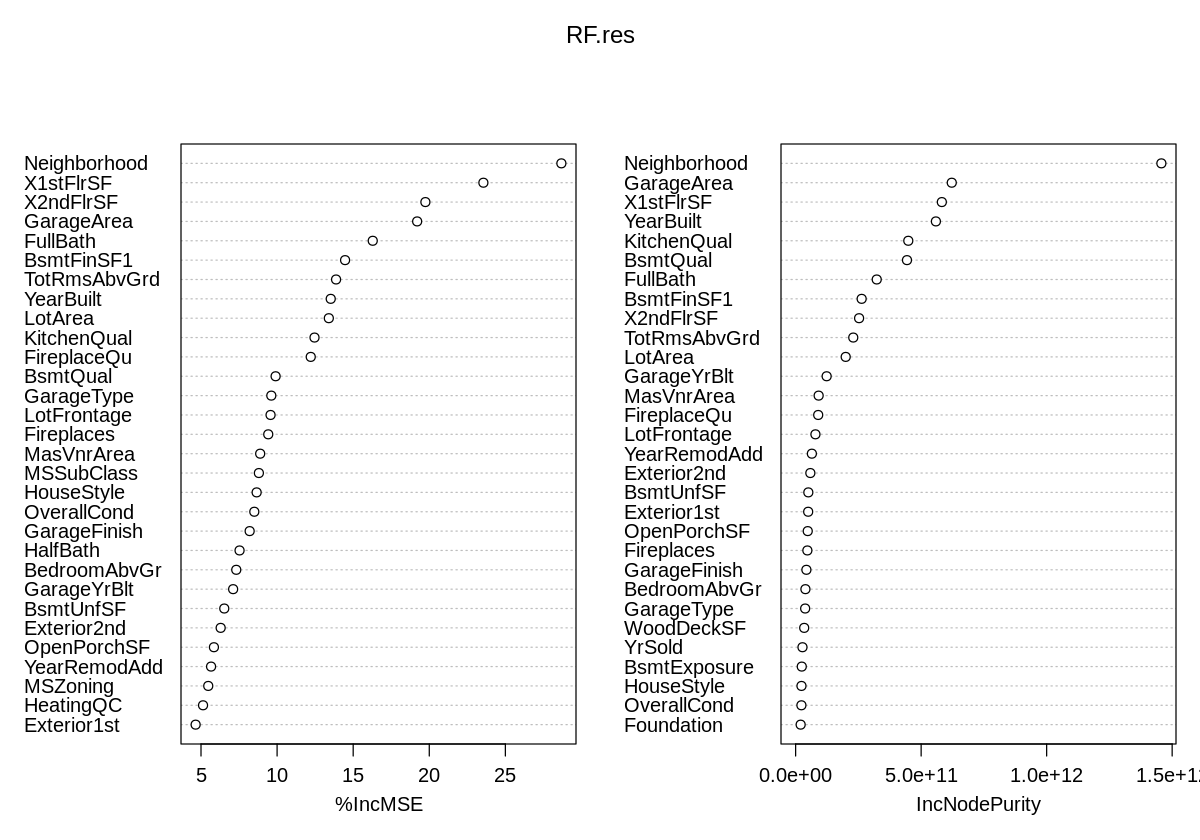

In [27]:
options(repr.plot.width = 10, repr.plot.height = 7)
varImpPlot(RF.res)
options(repr.plot.width = 5, repr.plot.height = 3)

# Evaluation du modèle sur le set de validation

In [28]:
RF.val.preds <- predict(RF.res, ValidSet)

In [29]:
head(data.frame(round(RF.val.preds), ValidSet$SalePrice))

,round.RF.val.preds.,ValidSet.SalePrice
,<dbl>,<int>
2,195565,181500
4,166549,140000
16,125079,132000
21,331797,325300
22,135192,139400
30,89402,68500


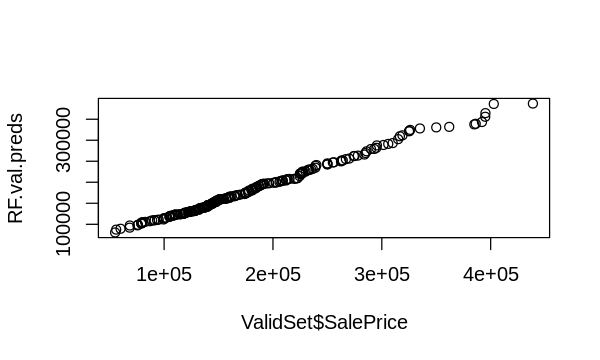

In [30]:
qqplot(ValidSet$SalePrice, RF.val.preds) 

## Calcul d'erreur

In [31]:
error_dollars = (RF.val.preds - ValidSet$SalePrice)

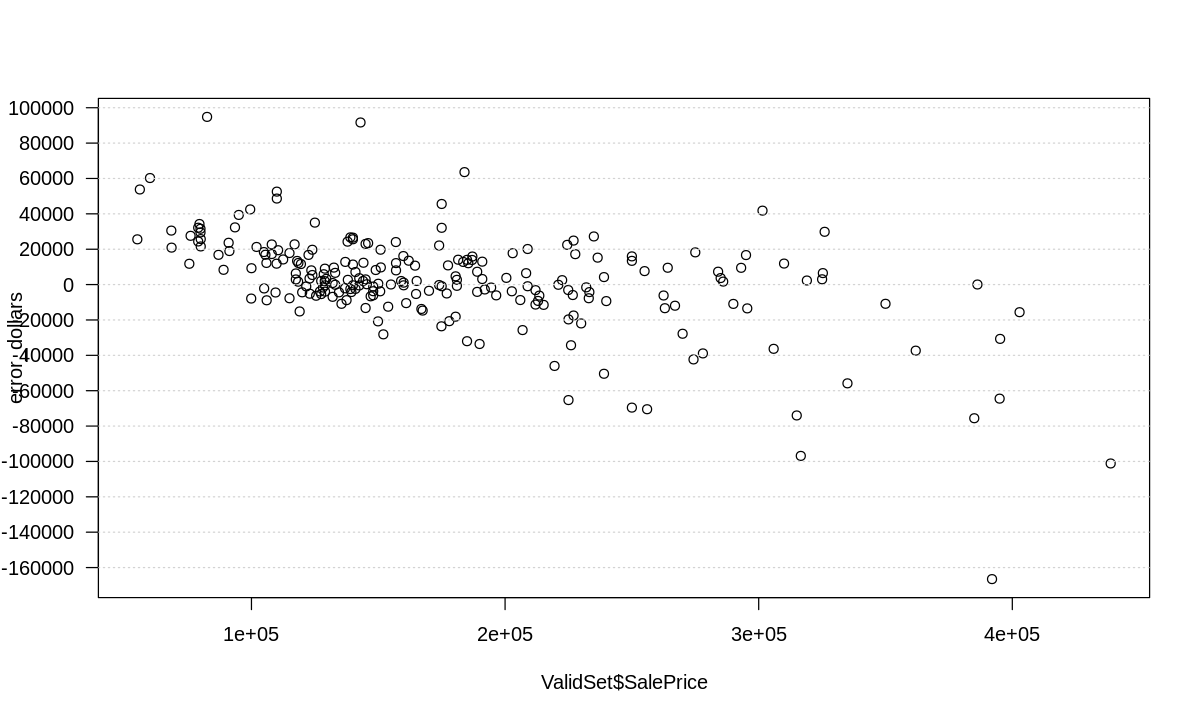

In [32]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(ValidSet$SalePrice, error_dollars, yaxt = 'n')
error_min = min(error_dollars)
error_max = max(error_dollars)
error_delta = 20000
error_min_rounded = round(error_min/error_delta)*error_delta
error_max_rounded = round(error_max/error_delta)*error_delta
ytick <- seq(error_min_rounded, error_max_rounded, by=error_delta)
axis(side=2, at=ytick, las=1)
abline(h = ytick, col = "lightgray", lty = 3)
options(repr.plot.width = 5, repr.plot.height = 3)

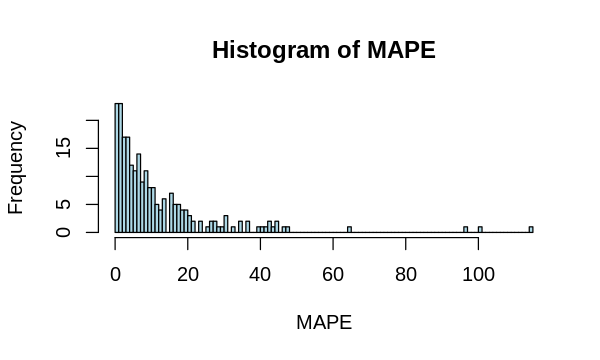

In [33]:
MAPE = 100*abs(RF.val.preds - ValidSet$SalePrice) / ValidSet$SalePrice
hist(MAPE, breaks=100, col='lightblue')

In [34]:
summary(MAPE)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.01323   2.58916   6.78909  11.81653  15.51173 114.93545 

In [35]:
rmse = sqrt(mean((RF.val.preds - ValidSet$SalePrice)^2))
cat("       => RMSE sur l'échantillon de validation =", round(rmse), "$")

       => RMSE sur l'échantillon de validation = 27749 $

# Exportation du modèle

In [36]:
saveRDS(RF.res, "model-RF-res.rds")